# Apple Stock

### Introduction:

We are going to use Apple's stock price.


### Step 1. Import the necessary libraries

### Step 2. Import the dataset from this [address](https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/09_Time_Series/Apple_Stock/appl_1980_2014.csv)

### Step 3. Assign it to a variable apple

### Step 4.  Check out the type of the columns

### Step 5. Transform the Date column as a datetime type

### Step 6.  Set the date as the index

### Step 7.  Is there any duplicate dates?

### Step 8.  Ops...it seems the index is from the most recent date. Make the first entry the oldest date.

### Step 9. Get the last business day of each month

### Step 10.  What is the difference in days between the first day and the oldest

### Step 11.  How many months in the data we have?

### Step 12. Plot the 'Adj Close' value. Set the size of the figure to 13.5 x 9 inches

### BONUS: Create your own question and answer it.

Column data types:
 Date          object
Open         float64
High         float64
Low          float64
Close        float64
Volume         int64
Adj Close    float64
dtype: object
Number of duplicate dates: 0

Monthly last business day sample:
              Open   High    Low  Close    Volume  Adj Close
Date                                                       
1980-12-31  34.25  34.25  34.13  34.13   8937600       0.53
1981-01-30  28.50  28.50  28.25  28.25  11547200       0.44
1981-02-27  26.50  26.75  26.50  26.50   3690400       0.41
1981-03-31  24.75  24.75  24.50  24.50   3998400       0.38
1981-04-30  28.38  28.62  28.38  28.38   3152800       0.44

Difference in days: 12261

Number of months: 404


C:\Users\USER\AppData\Local\Temp\ipykernel_16924\221358777.py:27: FutureWarning: 'BM' is deprecated and will be removed in a future version, please use 'BME' instead.
  monthly_last_business_day = apple.resample('BM').last()
C:\Users\USER\AppData\Local\Temp\ipykernel_16924\221358777.py:35: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  n_months = apple.resample('M').size().shape[0]


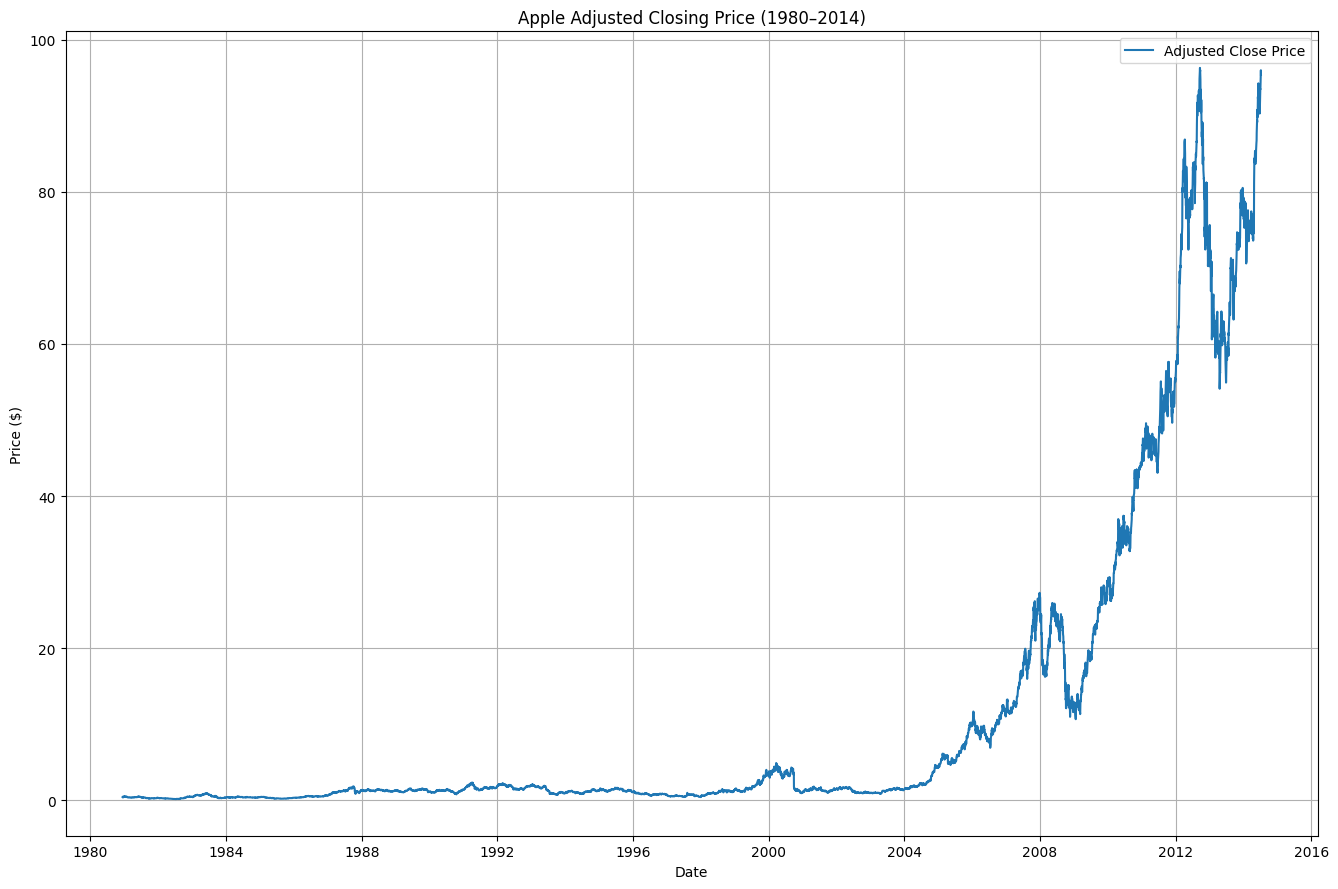


The maximum adjusted close price was $96.28 on 2012-09-19


In [1]:
# Step 1. Import the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Step 2. Import the dataset
# Step 3. Assign it to a variable apple
apple = pd.read_csv('appl_1980_2014.csv')

# Step 4. Check out the type of the columns
print("Column data types:\n", apple.dtypes)

# Step 5. Transform the Date column as a datetime type
apple['Date'] = pd.to_datetime(apple['Date'])

# Step 6. Set the date as the index
apple.set_index('Date', inplace=True)

# Step 7. Is there any duplicate dates?
duplicates = apple.index.duplicated().sum()
print(f"Number of duplicate dates: {duplicates}")

# Step 8. Sort the index so the first entry is the oldest date
apple.sort_index(inplace=True)

# Step 9. Get the last business day of each month
monthly_last_business_day = apple.resample('BM').last()
print("\nMonthly last business day sample:\n", monthly_last_business_day.head())

# Step 10. What is the difference in days between the first and the oldest?
days_difference = (apple.index[-1] - apple.index[0]).days
print(f"\nDifference in days: {days_difference}")

# Step 11. How many months in the data we have?
n_months = apple.resample('M').size().shape[0]
print(f"\nNumber of months: {n_months}")

# Step 12. Plot the 'Adj Close' value. Set the size of the figure to 13.5 x 9 inches
plt.figure(figsize=(13.5, 9))
plt.plot(apple['Adj Close'], label='Adjusted Close Price')
plt.title('Apple Adjusted Closing Price (1980–2014)')
plt.xlabel('Date')
plt.ylabel('Price ($)')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

# BONUS: Create your own question and answer it.
# Q: What was the maximum adjusted close price and when did it occur?
max_adj_close = apple['Adj Close'].max()
max_adj_close_date = apple['Adj Close'].idxmax()
print(f"\nThe maximum adjusted close price was ${max_adj_close:.2f} on {max_adj_close_date.date()}")
